# CS4243 - Lab Session 3
Computer Vision & Pattern Recognition

Week 5, Mon 11 Sep, AY 2023/24

Author: Dr. Amirhassan MONAJEMI. Modified by: Lingdong KONG

## Welcome! 👋

This notebook contains the tutorials for the `third` lab sessions. The following materials are covered:
- Part #1: Review
- Part #2: Median Filters
- Part #3: Fourier Transform
- Part #4: Filtering in Fourier Domain

Let's get started!

In [1]:
# importing necessary libraries 
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Part 1: Review

Goal:
- Review basic functions learned so far.
- Write functions to compute the entropy, power, and energy of an image.
- Write functions to implement the following filters:
 - `ideal low-pass filter`,
 - `ideal high-pass filter`,
 - `low-pass Gaussian filter`,
 - `high-pass Gaussian filter`.
 
You can download the sample image from: https://github.com/ldkong1205/cs4243_lab/blob/main/images/20220719_132627.jpg.

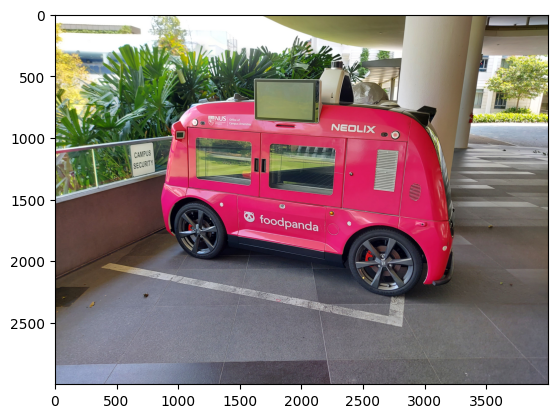

In [2]:
# define the path of image
img_path = './CS4243_2023_images_small/20220719_132627.jpg'

# load image using OpenCV-Python
img = cv2.imread(img_path)
img = img[...,::-1]  # convert BGR to RGB
plt.imshow(img)

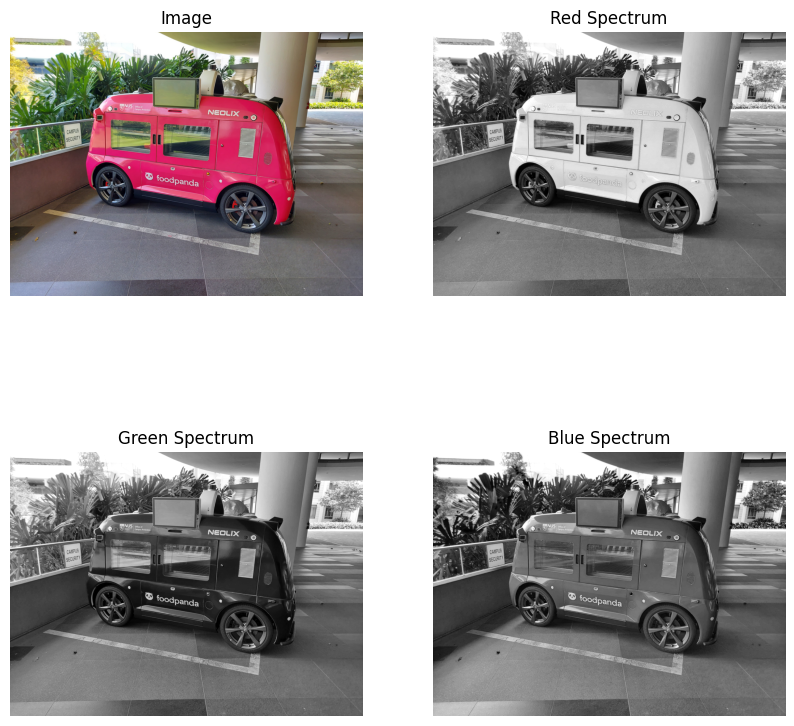

In [3]:
# convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=(10, 10))

plt.subplot(221), plt.imshow(img, cmap='jet'), plt.title('Image'), plt.axis('off') 
plt.subplot(222), plt.imshow(img[:,:,0], cmap='gray'), plt.title('Red Spectrum') , plt.axis('off')
plt.subplot(223), plt.imshow(img[:,:,1], cmap='gray'), plt.title('Green Spectrum'), plt.axis('off')
plt.subplot(224), plt.imshow(img[:,:,2], cmap='gray'), plt.title('Blue Spectrum'), plt.axis('off')

plt.show()

In [4]:
# make a matrix ready to be shown as an image
def ready_2_show(a, level=255):
    a = (a - np.min(a)) / (np.max(a) - np.min(a)) 
    a = a * level
    return np.uint8(a)

In [5]:
# Assignment #1

# write a function to compute the entropy of an image. 
# 'img' is the input image and 'N' is the number of graylevels, default is 256.
# 'img' is supposed to be a gray-level image.

def am_entropy(img, N=256):
    M = img.shape
    ssz = M[0] * M[1]
    
    ### START CODE HERE ### (~1 line)
    hist, bins = np.histogram(img.flatten(), 256, [0, 256])
    ### END CODE HERE ###
    
    hist = hist / ssz
    
    ### START CODE HERE ### (~1 line)
    ent = - np.sum(hist * np.log2(hist))
    ### END CODE HERE ###
    
    return ent

In [6]:
print("The entropy of your image is: {}.".format(am_entropy(gray)))

The entropy of your image is: 7.538941570951325.


In [7]:
# Assignment #2

# write a function to compute the power of an image.
# 'a' is the input image.
# The input image could be gray-level or color. 

def am_power(a):
    dim1 = a.shape
    
    if len(dim1) == 2:
        sz = dim1[0] * dim1[1] 
    elif len(dim1) == 3:
        sz = dim1[0] * dim1[1] * dim1[2]
    
    ### START CODE HERE ### (~1 line)
    pa = np.sum(a ** 2) / sz
    ### END CODE HERE ###
    
    return pa

In [8]:
print("The power of your gray-level image is: {}.".format(am_power(gray)))

The power of your gray-level image is: 101.17214241666667.


In [9]:
print("The power of your color image is: {}.".format(am_power(img)))

The power of your color image is: 101.90354827777777.


In [10]:
# Assignment #3

# write a function to compute the energy.
# 'a' is the input image.
# The input image could be gray-level or color. 

def am_energy(a):
    a = np.asarray(a)
    
    ### START CODE HERE ### (~1 line)
    energy = np.sum(a ** 2)
    ### END CODE HERE ###
    
    return energy

In [11]:
print("The totral energy of your gray-level image is: {}.".format(am_energy(gray)))

The totral energy of your gray-level image is: 1214065709.


In [12]:
print("The totral energy of your color image is: {}.".format(am_energy(img)))

The totral energy of your color image is: 3668527738.


In [13]:
# Assignment #4

# write a function to generate an ideal low-pass filter for frequency domain.
# 'M' and 'N' are spatial sizes of the image / filter.
# 'D0' is the cut-off point. 

def idealLowPass(M, N, D0):
    
    # initialize the filter with ones; since the filter is a complex function,
    # it has two channels, representing the real and imaginary parts:
    am_filter = np.ones((M, N), dtype=np.uint8)
    
    # normalized cut_off frequency is mapped to real index:
    D0 = D0 * min(M, N) / 2
    
    # scan through each pixel and calculate the distance of each pixel
    # to the image center. If the pixel is outside D0, it is changed to 0:
    for i in range(M):
        for j in range(N):
            
            ### START CODE HERE ### (~2 lines)
            d = np.sqrt(np.square(i - M / 2) + np.square(j - N / 2))
            # Hint: first calculate the Euclidean distance (d) of 
            # the current pixel (i, j) from the center of the matrix (M/2, N/2).
            if d > D0 :
                am_filter[i, j] = 0
                
            ### END CODE HERE ###
            
    return am_filter

In [15]:
f_lp = idealLowPass(10, 10, 0.5)
print("The ideal low-pass filter is:\n\n {}.".format(f_lp))

The ideal low-pass filter is:

 [[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0]
 [0 0 0 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 0 0]
 [0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 1 1 1 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]].


In [16]:
# you can directly convert the ideal low-pass filter to the ideal high-pass filter.
def idealHighPass(M, N, D0):
    return 1 - idealLowPass(M, N, D0)

f_hp = idealHighPass(10, 10, 0.5)
print("The ideal high-pass firther is:\n\n {}.".format(f_hp))

The ideal high-pass firther is:

 [[1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 0 0 0 1 1 1]
 [1 1 1 0 0 0 0 0 1 1]
 [1 1 1 0 0 0 0 0 1 1]
 [1 1 1 0 0 0 0 0 1 1]
 [1 1 1 1 0 0 0 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1]].


In [19]:
# Assignment #5

# write a function to generate a low-pass Gaussian filter.
# 'M' and 'N' are spatial sizes of the image / filter.
# 'D0' is the STD of the Gaussian filter, which is also its cut-off point.

def GaussLowPass(M, N, D0):
    
    # initialize the filter with zeros:
    am_filter = np.zeros((M, N))
    
    # normalized cut_off frequency is mapped to real index:
    D0 = D0 * min(M, N) / 2
    
    # scan through each pixel and calculate the distance of each pixel:
    for i in range(M):
        for j in range(N):
            
            ### START CODE HERE ### (~2 lines)
            
            # Hint: The first line calculates the Euclidean distance (d)
            # of the current pixel (i, j) from the center of the matrix (M/2, N/2).
            d = np.sqrt(np.square(i - M / 2) + np.square(j - N / 2))

            # Hint: The second line computes the Gaussian function value
            # for the current pixel and assigns it to the am_filter matrix.
            # The Gaussian function here decreases as the distance d increases
            # from the center. This ensures that higher frequencies are attenuated
            # more than the lower frequencies (near the center).
            
            am_filter[i, j] = np.exp(-d ** 2 / (2 * D0 ** 2))
            
            ### END CODE HERE ###
            
    return am_filter

In [20]:
f_lp_gaussian = GaussLowPass(8, 8, 0.8) 
print("The Gaussian low-pass filter is:\n\n {}.".format(f_lp_gaussian))

The Gaussian low-pass filter is:

 [[0.20961139 0.29502266 0.37660345 0.43601522 0.45783336 0.43601522
  0.37660345 0.29502266]
 [0.29502266 0.41523683 0.53005971 0.61368025 0.64438872 0.61368025
  0.53005971 0.41523683]
 [0.37660345 0.53005971 0.67663385 0.78337746 0.82257756 0.78337746
  0.67663385 0.53005971]
 [0.43601522 0.61368025 0.78337746 0.90696062 0.9523448  0.90696062
  0.78337746 0.61368025]
 [0.45783336 0.64438872 0.82257756 0.9523448  1.         0.9523448
  0.82257756 0.64438872]
 [0.43601522 0.61368025 0.78337746 0.90696062 0.9523448  0.90696062
  0.78337746 0.61368025]
 [0.37660345 0.53005971 0.67663385 0.78337746 0.82257756 0.78337746
  0.67663385 0.53005971]
 [0.29502266 0.41523683 0.53005971 0.61368025 0.64438872 0.61368025
  0.53005971 0.41523683]].


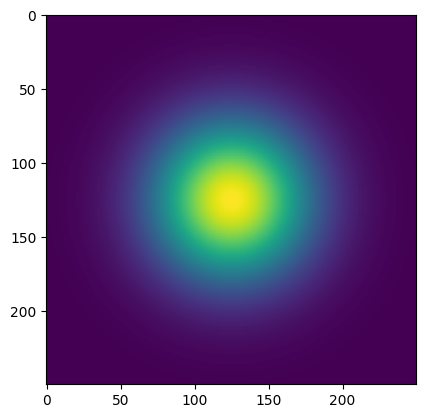

In [21]:
f_lp_gaussian2 = GaussLowPass(250, 250, 0.3)
plt.imshow(ready_2_show(f_lp_gaussian2))

In [22]:
# Assignment #6

# write a function to generate a high-pass Gaussian filter.
# note that you have already defined `GaussLowPass(·)`.
# you can directly convert the low-pass Gaussian filter to the high-pass one.

def GaussHighPass(M, N, D0):
    
    ### START CODE HERE ### (~1 line)
    am_filter = 1 - GaussLowPass(M, N, D0)
    ### END CODE HERE ###
    
    return am_filter

In [23]:
f_hp_gaussian = GaussHighPass(8, 8, 0.8)
print("The Gaussian high-pass filter is:\n\n {}.".format(f_hp_gaussian))

The Gaussian high-pass filter is:

 [[0.79038861 0.70497734 0.62339655 0.56398478 0.54216664 0.56398478
  0.62339655 0.70497734]
 [0.70497734 0.58476317 0.46994029 0.38631975 0.35561128 0.38631975
  0.46994029 0.58476317]
 [0.62339655 0.46994029 0.32336615 0.21662254 0.17742244 0.21662254
  0.32336615 0.46994029]
 [0.56398478 0.38631975 0.21662254 0.09303938 0.0476552  0.09303938
  0.21662254 0.38631975]
 [0.54216664 0.35561128 0.17742244 0.0476552  0.         0.0476552
  0.17742244 0.35561128]
 [0.56398478 0.38631975 0.21662254 0.09303938 0.0476552  0.09303938
  0.21662254 0.38631975]
 [0.62339655 0.46994029 0.32336615 0.21662254 0.17742244 0.21662254
  0.32336615 0.46994029]
 [0.70497734 0.58476317 0.46994029 0.38631975 0.35561128 0.38631975
  0.46994029 0.58476317]].


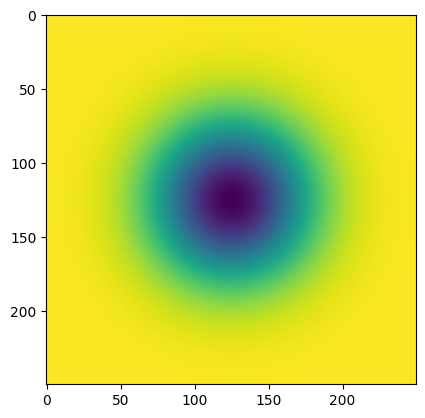

In [24]:
f_hp_gaussian2 = GaussHighPass(250, 250, 0.3)
plt.imshow(ready_2_show(f_hp_gaussian2))

### 🎉 Congratulations! You have finished Part #1 of this lab tutorial.

<hr>

## Part 2: Median Filter
Two images below have been contaminated with the `salt and pepper` noise with different intensity values.
 1. The first image: `noisy_car5.jpg`.
 2. The second image: `noisy_car15.jpg`.

You can download the first image from https://github.com/ldkong1205/cs4243_lab/blob/main/images/noisy_car5.jpg.

You can download the second image from https://github.com/ldkong1205/cs4243_lab/blob/main/images/noisy_car15.jpg.

Then,
- Use OpenCV's `medianBlur` function for median filtering.
- The second parameter, `ksize`, is the median window's size
- Filter each image with `ksize` equal to `3`, `5`, and `15`, respectively.
- Plot the filtered images and discuss the results.

In [25]:
# define the paths of these two images
img_path1 = './CS4243_2023_images_small/noisy_car5.jpg'
img_path2 = './CS4243_2023_images_small/noisy_car15.jpg'

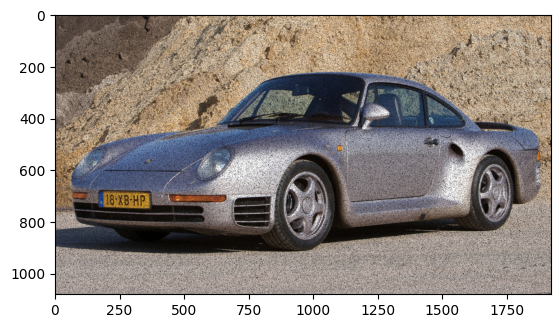

In [26]:
# load the first image
img1 = cv2.imread(img_path1)
img1 = img1[...,::-1]  # convert BGR to RGB
plt.imshow(img1)

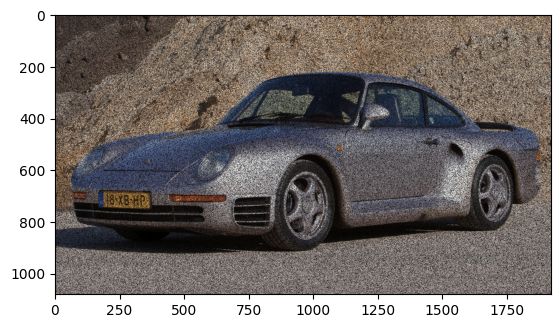

In [27]:
# load the second image
img2 = cv2.imread(img_path2)
img2 = img2[...,::-1]  # convert BGR to RGB
plt.imshow(img2)

In [28]:
# Assignment #7

# write a function to implement the median filter.
# 'img' is the input image.
# 'ksize' is the median window's size.

def MedianBlur(img, ksize):
    
    ### START CODE HERE ### (~1 line)
    filteredImg = cv2.medianBlur(img, ksize)
    ### END CODE HERE ###
    
    return filteredImg

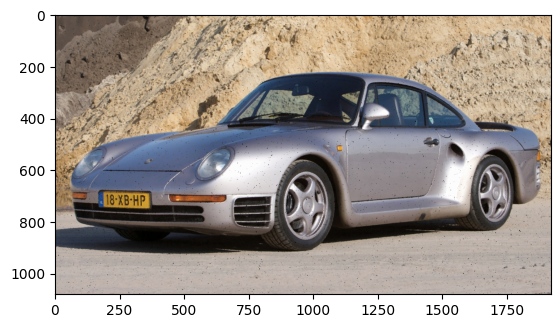

In [29]:
median_img1_k3 = MedianBlur(img1, ksize=3)
plt.imshow(median_img1_k3)

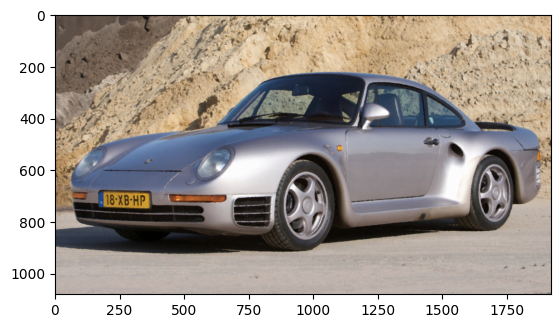

In [30]:
median_img1_k5 = MedianBlur(img1, ksize=5)
plt.imshow(median_img1_k5)

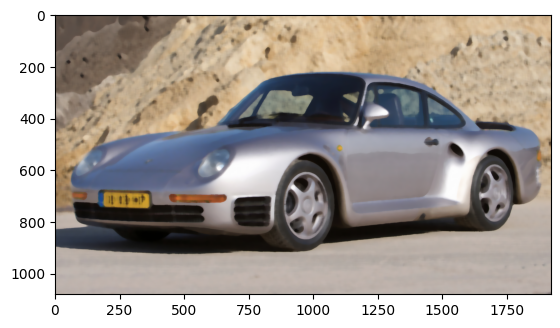

In [31]:
median_img1_k15 = MedianBlur(img1, ksize=15)
plt.imshow(median_img1_k15)

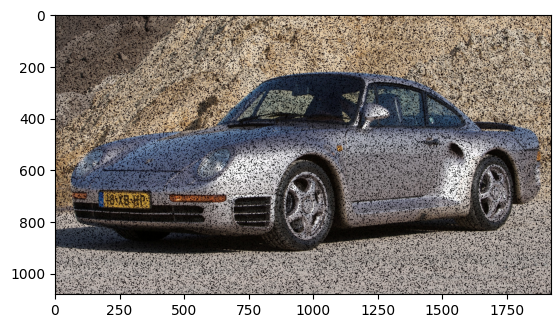

In [32]:
median_img2_k3 = MedianBlur(img2, ksize=3)
plt.imshow(median_img2_k3)

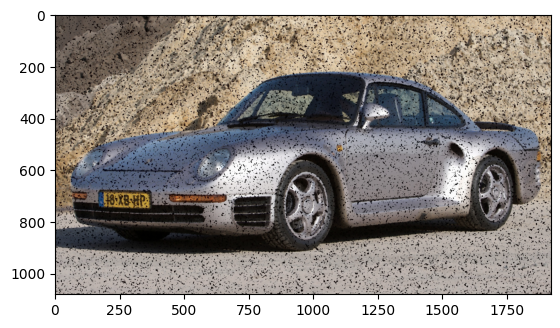

In [33]:
median_img2_k5 = MedianBlur(img2, ksize=5)
plt.imshow(median_img2_k5)

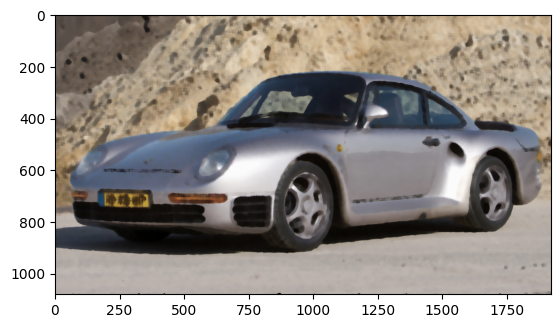

In [34]:
median_img2_k15 = MedianBlur(img2, ksize=15)
plt.imshow(median_img2_k15)

### 🎉 Congratulations! You have finished Part #2 of this lab tutorial.

<hr>

## Part 3: Fourier Transform

Goal:
- Observe the power spectral density and phase of the Fourier transform of an image.
- See the results of fftshift and log scale visualization

Plus:
You might want to try different patterned images below too:

1. img = cv.imread(`'high_spat_freq.bmp'`, 0)
2. img = cv.imread(`'low_spat_freq.bmp'`, 0) 
3. img = cv.imread(`'vertical_texture.bmp'`, 0)
4. img = cv.imread(`'diag_texture.bmp'`, 0)
5. img = cv.imread(`'IMG_plain.JPG'`, 0) 
6. img = cv.imread(`'hor_texture.jpg'`, 0)

You can download these images from https://github.com/ldkong1205/cs4243_lab/tree/main/images.

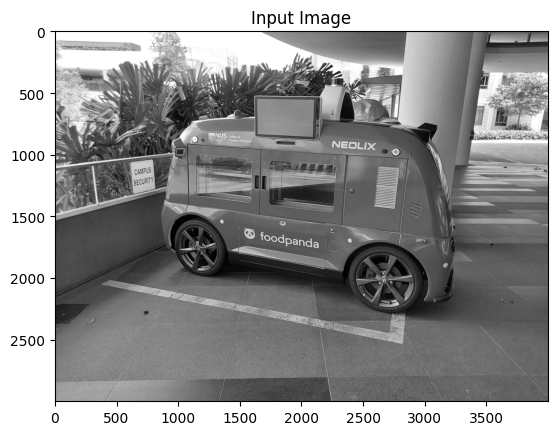

In [35]:
# load image using OpenCV-Python
img3 = cv2.imread('./CS4243_2023_images_small/20220719_132627.jpg', 0)  # '0' means reading as a gray-level image

plt.figure(figsize=(14, 10))
plt.subplot(121),
plt.title('Input Image')
plt.imshow(img3, cmap='gray')

In [36]:
# Assignment #8

# write a function to compute the FFT of an image and shift it.
# 'img' is the input image.

def FFT_Shift(img):
    
    ### START CODE HERE ### (~2 lines)
    f = np.fft.fft2(img)
    f_shift = np.fft.fftshift(f)
    ### END CODE HERE ###
    
    return f_shift

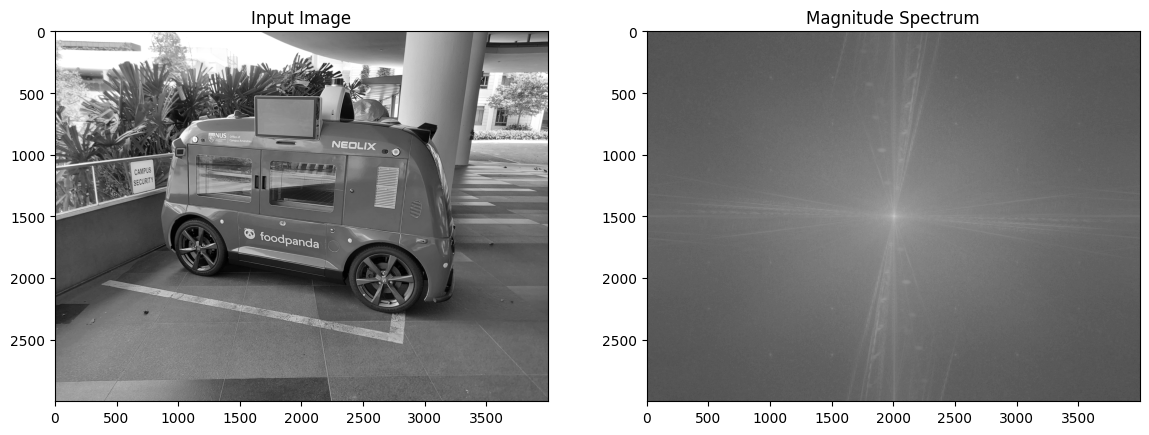

In [37]:
f3_shift = FFT_Shift(img3)

# log scale * 80 for a better visualization
magnitude_spectrum_f3 = 80 * np.log(np.abs(f3_shift))

plt.figure(figsize=(14, 10))
plt.subplot(121), plt.imshow(img3, cmap='gray')
plt.title('Input Image'),
plt.subplot(122), plt.imshow(magnitude_spectrum_f3, cmap='gray')
plt.title('Magnitude Spectrum'),
plt.show()

In [38]:
print("The magnitude spectrum of your image is:\n\n {}.".format(magnitude_spectrum_f3))

The magnitude spectrum of your image is:

 [[566.80514352 609.93544851 648.75374586 ... 636.46297031 648.75374586
  609.93544851]
 [673.64836256 695.73111548 644.20893907 ... 633.903667   676.30969054
  672.89932489]
 [583.09366853 596.06580958 560.54758146 ... 596.55668265 663.73739423
  657.72787935]
 ...
 [619.77864898 642.1769225  698.207678   ... 712.50548359 702.82214983
  668.02671304]
 [583.09366853 657.72787935 663.73739423 ... 606.47849251 560.54758146
  596.06580958]
 [673.64836256 672.89932489 676.30969054 ... 628.57970649 644.20893907
  695.73111548]].


In [39]:
# Assignment #9

# write a function to compute the FFT phase matrix.
# 'f_shift' is the shifted FFT of an image.

def FFT_Phase(f_shift):
    
    ### START CODE HERE ### (~1 line)
    phase = np.angle(f_shift)
    ### END CODE HERE ###
    
    return phase

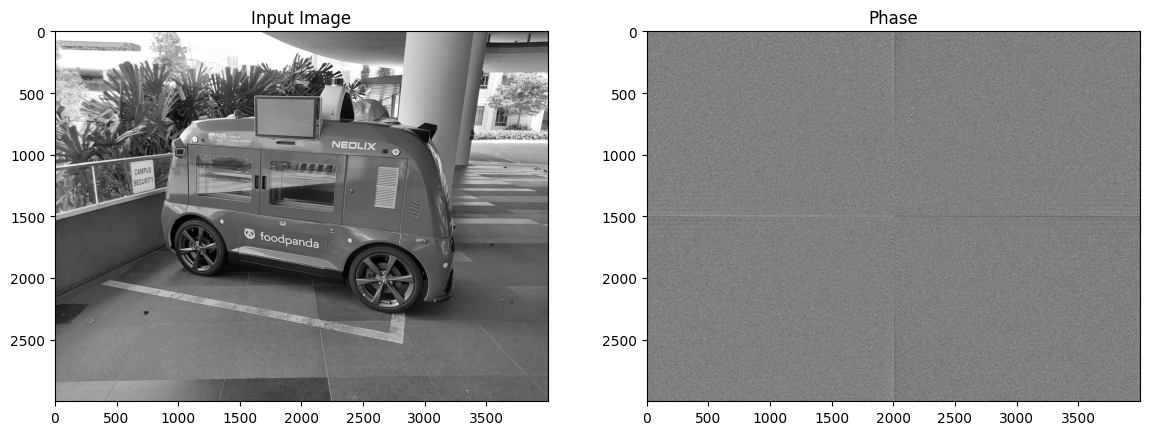

In [40]:
phase3 = FFT_Phase(f3_shift)

plt.figure(figsize=(14, 10))
plt.subplot(121),plt.imshow(img3, cmap = 'gray')
plt.title('Input Image'),
plt.subplot(122),plt.imshow(phase3, cmap = 'gray')
plt.title('Phase'),
plt.show()

In [41]:
print("The phase of your image is:\n\n {}.".format(phase3))

The phase of your image is:

 [[-3.14159265 -0.12188813 -2.98480917 ...  1.86387967  2.98480917
   0.12188813]
 [-1.33714669  2.34524864 -2.8605022  ...  0.19890381  1.0821442
   2.91921355]
 [-2.24457941  2.28977404 -2.29141026 ... -0.5228578   0.45058677
  -3.01285189]
 ...
 [-2.04655878  0.0467007   1.24930788 ...  2.83242558 -2.35693066
  -0.09577315]
 [ 2.24457941  3.01285189 -0.45058677 ...  0.09700583  2.29141026
  -2.28977404]
 [ 1.33714669 -2.91921355 -1.0821442  ... -0.24946642  2.8605022
  -2.34524864]].


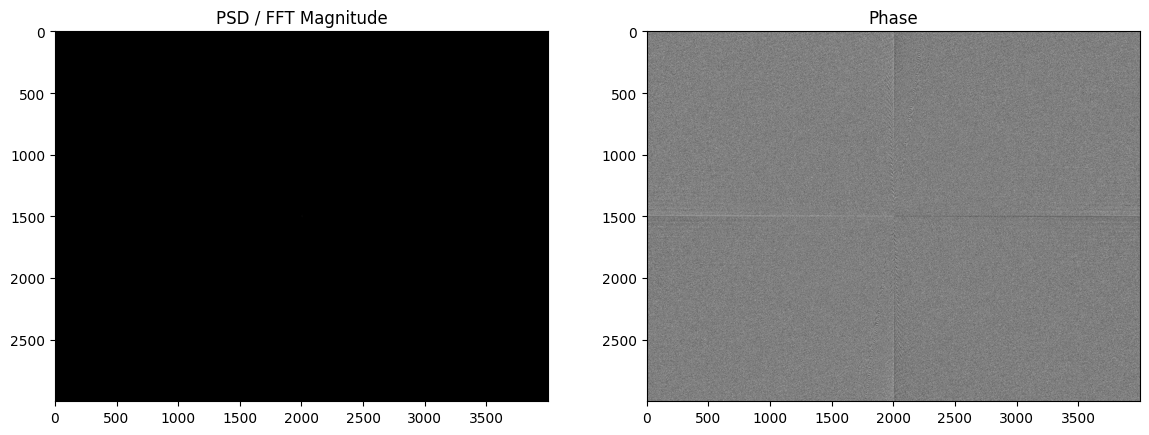

In [42]:
# showing the shifted magnitude and phase of the FFT
plt.figure(figsize=(14, 10))
plt.subplot(121), plt.imshow(ready_2_show(np.abs(f3_shift)), cmap = 'gray')
plt.title('PSD / FFT Magnitude'),
plt.subplot(122), plt.imshow(ready_2_show(phase3), cmap = 'gray')
plt.title('Phase'),
plt.show()

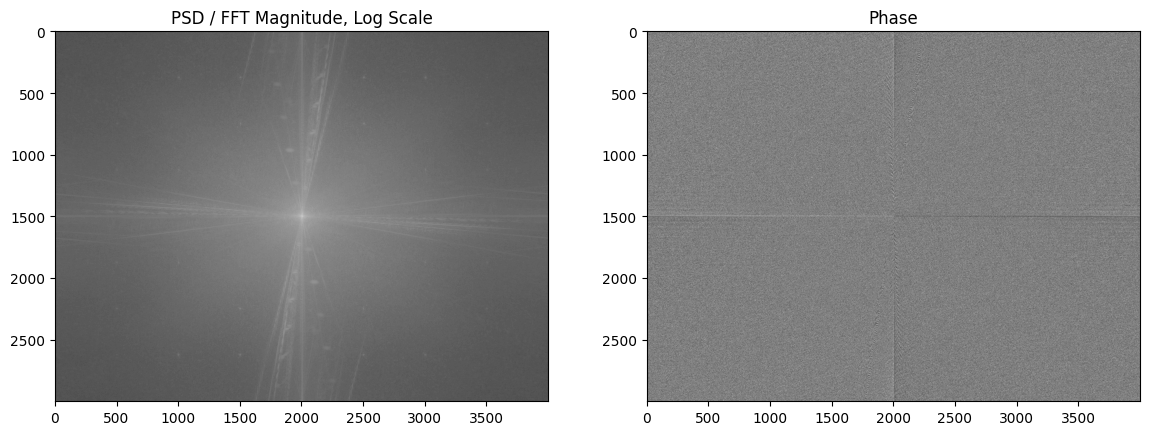

In [43]:
# showing the shifted log magnitude and phase of the FFT

plt.figure(figsize=(14, 10))
plt.subplot(121),plt.imshow(ready_2_show(np.log(np.abs(f3_shift)) ), cmap = 'gray')
plt.title('PSD / FFT Magnitude, Log Scale'),
plt.subplot(122),plt.imshow(ready_2_show(phase3), cmap = 'gray')
plt.title('Phase'),
plt.show()

In [44]:
# Assignment #10

# write a function to compute the image power in the spatial domain and FFT domain, respectively.
# 'img_spatial' is the original image.
# 'img_fft' is the FFT of this image.
# note that you have already implemented `am_power(·)` function.

def Compute_Power(img_spatial, img_fft):
    
    ### START CODE HERE ### (~2 lines)
    power_spatial = am_power(img_spatial)
    power_fft = am_power(img_fft)
    ### END CODE HERE ###
    
    print("The power of the spatial image is: {}.".format(power_spatial))
    print("The power of the FFT image is: {}.".format(power_fft))

In [45]:
Compute_Power(img3, f3_shift)

The power of the spatial image is: 100.73651516666666.
The power of the FFT image is: (160445896694.00012-7.146368026733399e-07j).


### 🎉 Congratulations! You have finished Part #3 of this lab tutorial.

<hr>

## Part 4: Filtering in Fourier Domain

Goal:
- Develop a program to apply FFT domain filtering on your image.
- Compare different filters.

So far, you have implemented the `ideal low-pass filter`, `ideal high-pass filter`, `low-pass Gaussian filter`, and `high-pass Gaussian filter`. We provide with you the following two filters in this section:
- `low-pass Butterworth filter`,
- `high-pass Butterworth filter`,
- `band-pass Butterworth filter`,
- `band-reject Butterworth filter`.

In [46]:
def ButterworthLowPass(M, N, D0, n_o):
    
    # initialize the filter with zeros:
    am_filter = np.zeros((M, N))
    
    # normalized cut_off frequency is mapped to real index:
    D0 = D0 * min(M, N) / 2
    n_o = 2 * n_o
    for i in range(M):
        for j in range(N):
            d = ((i - M / 2) ** 2 + (j - N / 2) ** 2) ** 0.5
            am_filter[i, j] = 1 / (1 + (d / D0) ** n_o)
            
    return am_filter

In [47]:
def ButterworthHighPass(M, N, D0, n_o):
    return 1 - ButterworthLowPass(M, N, D0, n_o)

In [48]:
def ButterworthBandPass(M, N, D0, D1, n_o):
    am_filter = ButterworthLowPass(M, N, D0, n_o)
    am_filter = ButterworthLowPass(M, N, D1, n_o) - am_filter
    am_filter = am_filter * (1 / np.max(am_filter)) 
    return am_filter

In [49]:
def ButterworthBandReject(M, N, D0, D1, n_o):
    return 1 - ButterworthBandPass(M, N, D0, D1, n_o)

You should follow these procedures:
 1. Read the image.
 2. Compute its FFT and apply FFT shift.
 3. Get the absolute value / PSD and phase of the FFT.
 4. Design your filters and apply your filters on the absolute value matrix (element-wise multiplication).
 5. Obtain the complex FFT matrix.
 6. Apply inverse shift and inverse FFT.
 7. Show the resulting filtered image.
 

You can download the sample image from: https://github.com/ldkong1205/cs4243_lab/blob/main/images/wm74_2.bmp.

In [50]:
# constant coefficient to show the image if necessary
dc = 100

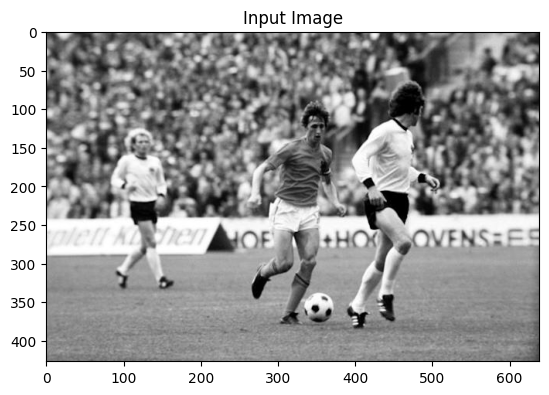

In [51]:
# load image using OpenCV-Python
img4 = cv2.imread('./CS4243_2023_images_small/wm74_2.bmp', 0)  # '0' means reading as a gray-level image

plt.figure(figsize=(14, 10))
plt.subplot(121),
plt.title('Input Image')
plt.imshow(img4, cmap='gray')

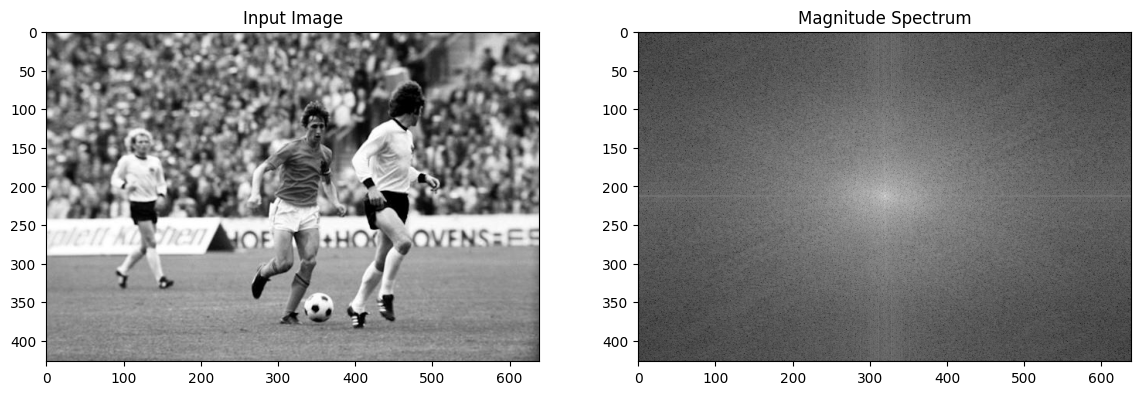

In [53]:
# conduct Fourier transform and compute the magnitude using the `FFT_Shift(·)` function.
f4_shift = FFT_Shift(img4)

# log scale * 80 for a better visualization
magnitude_spectrum_f4 = 80 * np.log(np.abs(f4_shift))

plt.figure(figsize=(14, 10))
plt.subplot(121), plt.imshow(img4, cmap='gray')
plt.title('Input Image'),
plt.subplot(122), plt.imshow(magnitude_spectrum_f4, cmap='gray')
plt.title('Magnitude Spectrum'),
plt.show()

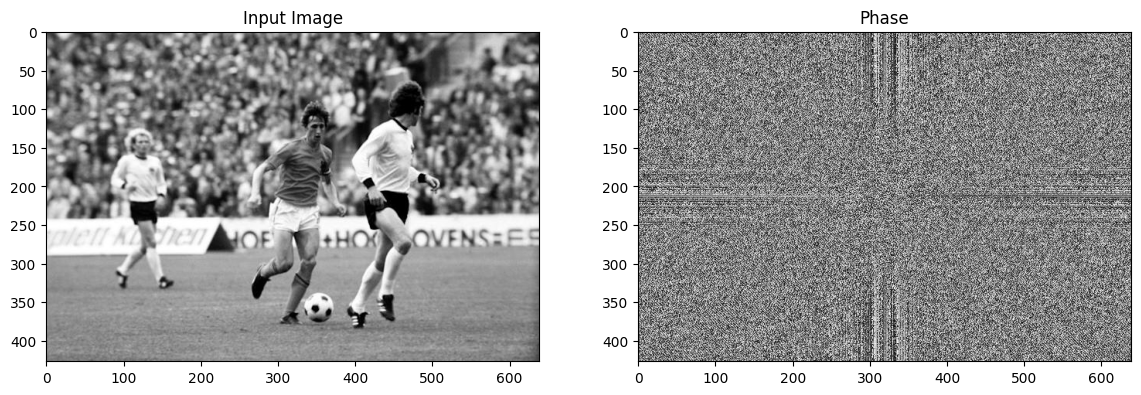

In [54]:
# compute the phase using the `FFT_Phase(·)` function.
phase4 = FFT_Phase(f4_shift)

plt.figure(figsize=(14, 10))
plt.subplot(121),plt.imshow(img4, cmap = 'gray')
plt.title('Input Image'),
plt.subplot(122),plt.imshow(phase4, cmap = 'gray')
plt.title('Phase'),
plt.show()

In [55]:
# Assignment #11

# write a function to apply Fourier domain filtering to an image.
# 'img' is the input image.
# 'filter_type' is the type of filter that you want to use.
# Hint: you might want to choose your own parameters (e.g. cut-off point) for the filters.

def Fourier_Filtering(img, filter_type):
    M = img.shape
    
    if filter_type == 'idealLowPass':
        ### START CODE HERE ### (~1 line)
        f = idealLowPass(M[0], M[1], 0.4)
        ### END CODE HERE ###
        
    elif filter_type == 'idealHighPass':
        ### START CODE HERE ### (~1 line)
        f = idealHighPass(M[0], M[1], 0.4)
        ### END CODE HERE ###
        
    elif filter_type == 'GaussLowPass':
        ### START CODE HERE ### (~1 line)
        f = GaussLowPass(M[0], M[1], 0.4)
        ### END CODE HERE ###
        
    elif filter_type == 'GaussHighPass':
        ### START CODE HERE ### (~1 line)
        f = GaussHighPass(M[0], M[1], 0.4)
        ### END CODE HERE ###
        
    elif filter_type == 'ButterworthLowPass':
        ### START CODE HERE ### (~1 line)
        f = ButterworthLowPass(M[0], M[1], 0.5, 1)
        ### END CODE HERE ###
        
    elif filter_type == 'ButterworthHighPass':
        ### START CODE HERE ### (~1 line)
        f = ButterworthHighPass(M[0], M[1], 0.5, 1)
        ### END CODE HERE ###
        
    elif filter_type == 'ButterworthBandPass':
        ### START CODE HERE ### (~1 line)
        f = ButterworthBandPass(M[0], M[1], 0.05, 0.2 ,2)
        ### END CODE HERE ###
    
    elif filter_type == 'ButterworthBandReject':
        ### START CODE HERE ### (~1 line)
        f = ButterworthBandReject(M[0], M[1], 0.05, 0.2 ,2)
        ### END CODE HERE ###

    return f

In [56]:
f_idealLowPass = Fourier_Filtering(img4, filter_type='idealLowPass')

# compute magnitude and phase of the FFT of the image
dft_shift4_abs = np.abs(f4_shift)
dft_shift4_phase = np.angle(f4_shift) 

# filtering, element wise multiplication
dft_shift4_abs = np.multiply(dft_shift4_abs, f_idealLowPass)

# build the complext matrix after filtering 
z = np.multiply(dft_shift4_abs, np.exp((1j) * (dft_shift4_phase)))

# use `fftshift` to re-shift the frequency components to their original place
# and make them ready for inverse fft transform
idft_shift4 = np.fft.ifftshift(z)

In [57]:
# show the filtered image in the fft domain;
# 'z' is a complex matrix, same size of your image, real and imaginary elements can be seen here
print("The complex matrix is:\n\n {}.\n\n".format(z))

print("The minimum phase and magnitude are: '{}' and '{}'.\n".format(np.min(dft_shift4_phase), np.min(np.abs(z))))
print("The maximum phase and magnitude are: '{}' and '{}'.".format(np.max(dft_shift4_phase), np.max(np.abs(z))))

The complex matrix is:

 [[ 0.+0.j -0.+0.j  0.+0.j ... -0.+0.j  0.-0.j  0.+0.j]
 [ 0.-0.j -0.+0.j  0.+0.j ...  0.-0.j -0.+0.j -0.+0.j]
 [-0.+0.j  0.-0.j  0.+0.j ...  0.-0.j  0.+0.j  0.+0.j]
 ...
 [ 0.+0.j  0.+0.j -0.+0.j ...  0.+0.j -0.+0.j  0.-0.j]
 [ 0.-0.j  0.-0.j -0.+0.j ...  0.+0.j  0.-0.j -0.+0.j]
 [ 0.+0.j -0.+0.j  0.-0.j ...  0.+0.j  0.-0.j  0.+0.j]].


The minimum phase and magnitude are: '-3.1415685999684095' and '0.0'.

The maximum phase and magnitude are: '3.1415685999684078' and '37763895.0'.


In [58]:
# Assignment #12

# inverse FFT, convert the image back to the spatial domain.
# 'idft_shift' is the re-shifted FFT of the image.
# compute 'abs' is necessary since the output of inverse fourier, 'ifft', is complex.

def InverstFFT(idft_shift):
    ### START CODE HERE ### (~1 line)
    ifimg = np.fft.ifft2(idft_shift)
    ### END CODE HERE ###
    
    return np.abs(ifimg)

In [59]:
ifimg4 = InverstFFT(idft_shift4)

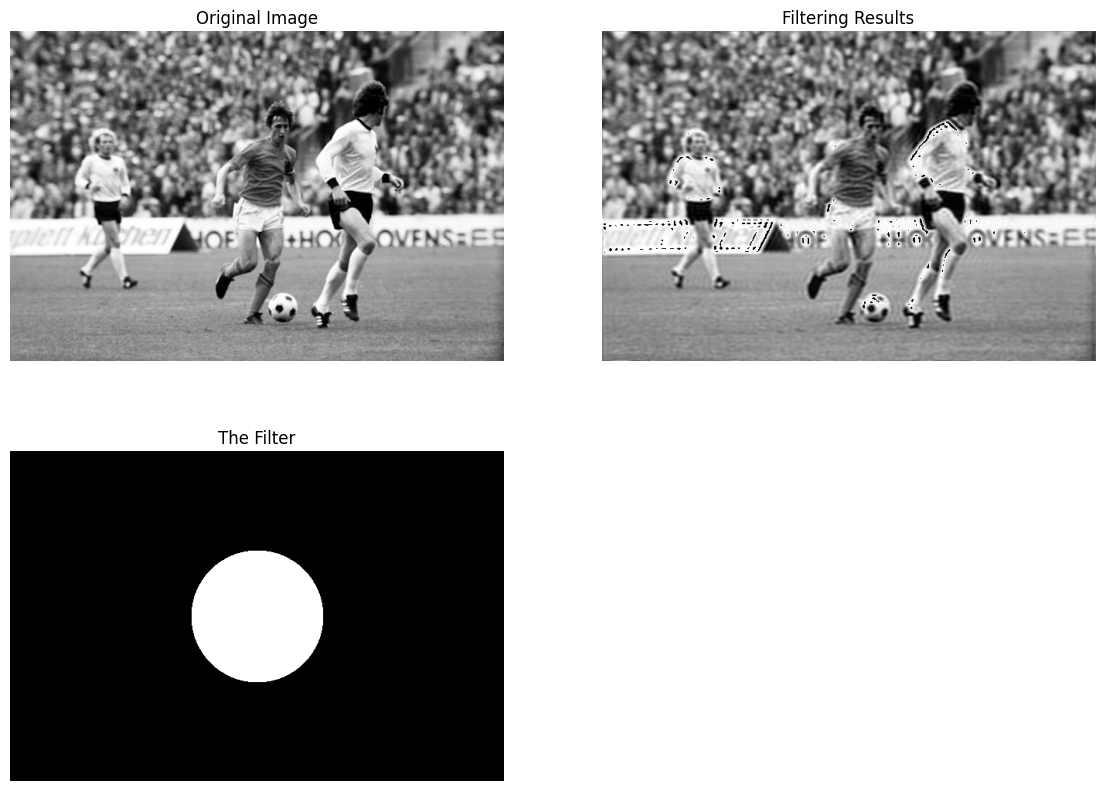

In [60]:
plt.figure(figsize=(14, 10))
plt.subplot(221), plt.imshow(img4, 'gray'), plt.title('Original Image')
plt.axis('off')
plt.subplot(222), plt.imshow(np.uint8(ifimg4), 'gray'), plt.title('Filtering Results')
plt.axis('off')
plt.subplot(223), plt.imshow(np.uint8(f_idealLowPass * dc), 'gray'), plt.title('The Filter')
plt.axis('off')
plt.show()

In [61]:
# Assignment #13

# you should be able to conduct similar procedures using other filters.
# try and compare the results among different filters.

### 🎉 Congratulations! You have finished this lab tutorial.